# 1.Setup do projeto

### Kmeans

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.cluster import KMeans 

# 2. Carregando dados

In [149]:
heart_disease = pd.read_csv('data/raw/processed_cleveland.data', header=None, names=['age', 'sex', 'cp', 'trestbps', 'chol','fbs','restecg','thalach','exang', 'oldpeak', 'slope', 'ca', 'thal', 'num'])

In [150]:
heart_disease.replace('?', 0, inplace=True)
heart_disease.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,num
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0,0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0,2
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0,1
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0,0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0,0


In [151]:
heart_disease.shape

(303, 14)

# 3. Preparação de dados

In [152]:
heart_disease_nao_rotulado = heart_disease.iloc[:, :-1]
heart_disease_nao_rotulado.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63.0,1.0,1.0,145.0,233.0,1.0,2.0,150.0,0.0,2.3,3.0,0.0,6.0
1,67.0,1.0,4.0,160.0,286.0,0.0,2.0,108.0,1.0,1.5,2.0,3.0,3.0
2,67.0,1.0,4.0,120.0,229.0,0.0,2.0,129.0,1.0,2.6,2.0,2.0,7.0
3,37.0,1.0,3.0,130.0,250.0,0.0,0.0,187.0,0.0,3.5,3.0,0.0,3.0
4,41.0,0.0,2.0,130.0,204.0,0.0,2.0,172.0,0.0,1.4,1.0,0.0,3.0


# 4. Agrupamento

In [153]:
model = KMeans(n_clusters=5)
model.fit(heart_disease_nao_rotulado)
grupos = model.predict(heart_disease_nao_rotulado)

In [154]:
print(grupos)

[3 2 2 3 1 3 3 0 3 1 1 0 2 3 1 1 3 3 2 3 1 0 0 3 1 3 0 2 3 1 3 3 0 3 3 3 1
 2 0 2 2 1 0 1 0 3 1 2 4 1 1 1 0 3 2 2 3 1 3 1 0 1 1 0 1 0 1 3 0 3 2 3 2 3
 1 0 2 0 3 2 1 2 0 0 0 3 3 1 3 3 0 1 3 1 3 3 3 3 1 3 3 1 0 2 1 0 1 3 2 1 0
 3 1 0 2 1 1 1 0 2 3 4 3 2 0 3 0 2 3 1 3 3 3 3 3 3 1 2 1 3 3 0 1 0 3 3 0 3
 0 0 0 2 4 0 2 0 0 0 0 0 1 0 1 2 3 1 3 0 0 1 2 2 2 4 1 2 3 1 0 3 3 4 3 2 0
 1 3 2 0 2 1 0 3 2 1 0 2 3 3 2 3 0 1 0 1 0 2 1 3 3 3 3 3 3 3 1 1 3 0 3 3 3
 1 2 3 3 1 0 1 1 1 0 1 2 1 2 2 3 3 0 3 0 3 3 1 2 3 2 3 1 1 2 2 0 0 1 3 1 2
 2 3 0 3 3 1 0 1 1 3 1 1 2 0 1 1 3 0 3 3 1 0 3 1 1 1 0 3 3 3 3 1 0 1 1 1 1
 1 2 2 1 1 3 1]


# 5. Visualização

In [219]:
# sugestão: TSNE
xs = heart_disease.iloc[:, 0]
ys = heart_disease.iloc[:, 7]
centroids = model.cluster_centers_
centroids_x = centroids[:, 0]
centroids_y = centroids[:, 7]

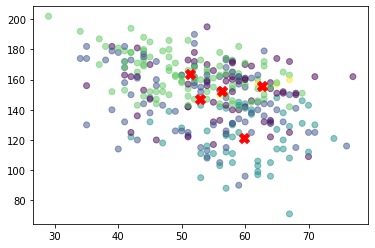

In [220]:
_=plt.scatter(xs, ys, c=grupos, alpha=.5)
_=plt.scatter(centroids_x, centroids_y, c='red', marker='X', s=100)


### Agrupamento Hierarquico

In [234]:
from sklearn.preprocessing import normalize
idade = list(heart_disease['age'])
heart_disease_norm = normalize(heart_disease)

In [222]:
mesclagens = linkage(heart_disease_norm, method='complete')

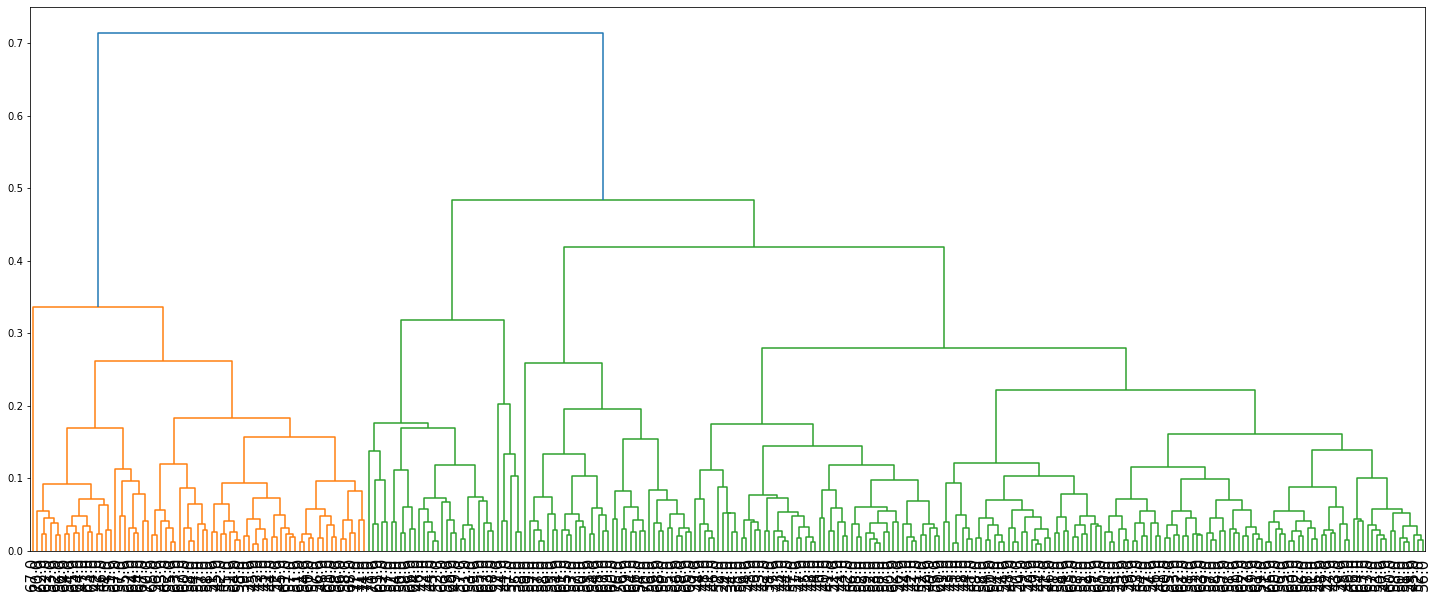

In [236]:
plt.figure(figsize=(25,10))
plt.xticks(rotation=90)
_=dendrogram(mesclagens, labels=idade, leaf_font_size=15)


### DBSCAN - NÃO Finalizado. Luiz eu não consegui chegar em um resultado no DBSCAN.Tentei seguir exemplo abaixo mas creio que não entendi muito bem

In [247]:

from sklearn.cluster import DBSCAN
from sklearn import metrics
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

centers = [[xs, ys], [centroids_x, centroids_y]]

X, labels_true = make_blobs(n_samples=750, centers=centers, cluster_std=0.4,
                            random_state=0)


db = DBSCAN(eps=2, min_samples=5).fit(heart_disease_norm)

core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
labels = db.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

print('Estimated number of clusters: %d' % n_clusters_)
print('Estimated number of noise points: %d' % n_noise_)
print("Homogeneity: %0.3f" % metrics.homogeneity_score(labels_true, labels))
print("Completeness: %0.3f" % metrics.completeness_score(labels_true, labels))
print("V-measure: %0.3f" % metrics.v_measure_score(labels_true, labels))
print("Adjusted Rand Index: %0.3f"
      % metrics.adjusted_rand_score(labels_true, labels))
print("Adjusted Mutual Information: %0.3f"
      % metrics.adjusted_mutual_info_score(labels_true, labels))
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(X, labels))

# #############################################################################
# Plot result
import matplotlib.pyplot as plt

# Black removed and is used for noise instead.
unique_labels = set(labels)
colors = [plt.cm.Spectral(each)
          for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        # Black used for noise.
        col = [0, 0, 0, 1]

    class_member_mask = (labels == k)

    xy = X[class_member_mask & core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=14)

    xy = X[class_member_mask & ~core_samples_mask]
    plt.plot(xy[:, 0], xy[:, 1], 'o', markerfacecolor=tuple(col),
             markeredgecolor='k', markersize=6)

plt.title('Estimated number of clusters: %d' % n_clusters_)
plt.show()

ValueError: setting an array element with a sequence.